# PMF, CDF, Joint Distribution

---

### Instructions:
-  Replace the placeholders (between <font color="green">`## TODO ##`</font> and <font color="green">`## TODO ##`</font>) with the appropriate details.

---



The objective of this notebook is to understand the concepts of PMF and CDF and joint distribution.

In [2]:
import simpy
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Parameters

In [ ]:
num_counters = 1
arrival_rate = 5  # customers per minute
service_rate = 6  # customers per minute
simulation_time = 10000  # minutes

## Simulation

In [ ]:
def simulate_queue_system():
    """
    Simulates a queue system with customers arriving at service counters, waiting for service, and being served.

    This function defines the customer behavior and the setup of the simulation environment. It initializes the simulation environment, sets up the service counters, and continuously generates customer arrivals based on specified arrival and service rates. The function runs the simulation until the specified simulation time and returns the recorded wait times, arrival times, and service times of the customers.

    Returns:
        tuple: A tuple containing three lists - wait_times, arrival_times, and service_times, which record the respective times for each customer in the simulation.
    """

    def customer(
        env: simpy.Environment,
        name: str,
        counter: simpy.Resource,
        service_time: float,
        wait_times: list,
        arrival_times: list,
        service_times: list,
    ):
        """
        Simulates a customer arriving at a service counter, waiting for service, and then being served.

        Args:
            env (simpy.Environment): The simulation environment.
            name (str): The name of the customer.
            counter (simpy.Resource): The service counter resource.
            service_time (float): The time it takes to serve the customer.
            wait_times (list): A list to record the wait times of customers.
            arrival_times (list): A list to record the arrival times of customers.
            service_times (list): A list to record the service times of customers.

        Yields:
            simpy.events.Process: The process of the customer being served.
        """
        arrival_time = env.now
        arrival_times.append(arrival_time)
        with counter.request() as req:
            yield req
            yield env.timeout(service_time)
            service_times.append(service_time)
            wait_time = env.now - arrival_time
            wait_times.append(wait_time)

    def setup(
        env: simpy.Environment,
        num_counters: int,
        arrival_rate: float,
        service_rate: float,
        wait_times: list,
        arrival_times: list,
        service_times: list,
    ):
        """
        Sets up the simulation environment with a specified number of service counters and customer arrival and service rates.

        Args:
            env (simpy.Environment): The simulation environment.
            num_counters (int): The number of service counters available.
            arrival_rate (float): The rate at which customers arrive.
            service_rate (float): The rate at which customers are served.
            wait_times (list): A list to record the wait times of customers.
            arrival_times (list): A list to record the arrival times of customers.
            service_times (list): A list to record the service times of customers.

        Yields:
            simpy.events.Timeout: The timeout event for the next customer arrival.
        """
        counter = simpy.Resource(env, num_counters)
        while True:
            yield env.timeout(np.random.exponential(1 / arrival_rate))
            service_time = np.random.exponential(1 / service_rate)
            env.process(
                customer(
                    env,
                    "Customer",
                    counter,
                    service_time,
                    wait_times,
                    arrival_times,
                    service_times,
                )
            )

    while True:
        env = simpy.Environment()
        wait_times = []
        arrival_times = []
        service_times = []
        env.process(
            setup(
                env,
                num_counters,
                arrival_rate,
                service_rate,
                wait_times,
                arrival_times,
                service_times,
            )
        )
        env.run(until=simulation_time)

        if len(wait_times) == len(arrival_times) == len(service_times):
            return wait_times, arrival_times, service_times
        
wait_times, arrival_times, service_times = simulate_queue_system()

Exception ignored in: <generator object simulate_queue_system.<locals>.customer at 0x00000224CE1F1240>
Traceback (most recent call last):
  File "C:\Users\parsa\AppData\Local\Temp\ipykernel_12716\2142843669.py", line 37, in customer
  File "C:\Users\parsa\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\simpy\resources\resource.py", line 84, in __exit__
    def __exit__(

KeyboardInterrupt: 


## Plot the RVs Distributions

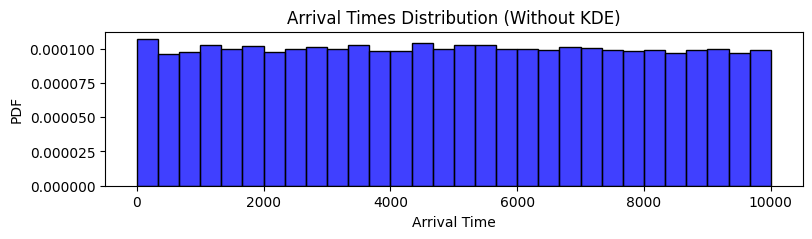

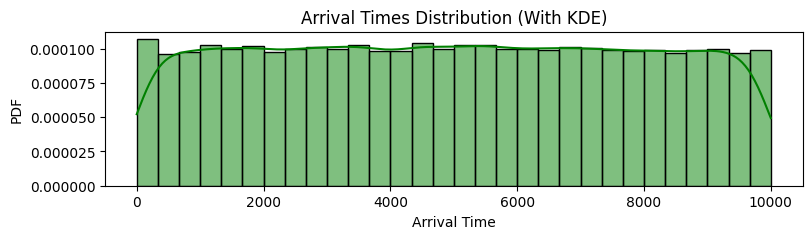

In [ ]:
######################  TODO  ########################

plt.figure(figsize=(9, 2))
sns.histplot(arrival_times, kde=False, bins=30, color="blue", stat="density")
plt.title("Arrival Times Distribution (Without KDE)")
plt.xlabel("Arrival Time")
plt.ylabel("PDF")
plt.show()

plt.figure(figsize=(9, 2))
sns.histplot(arrival_times, kde=True, bins=30, color="green", stat="density")
plt.title("Arrival Times Distribution (With KDE)")
plt.xlabel("Arrival Time")
plt.ylabel("PDF")
plt.show()

######################  TODO  ########################

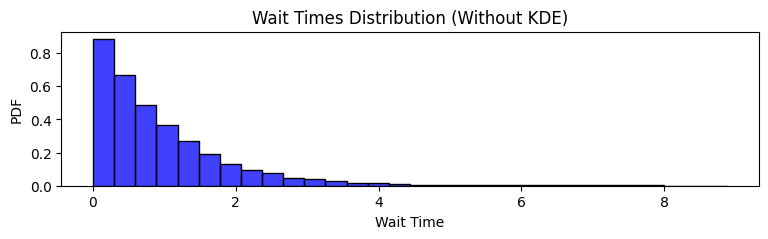

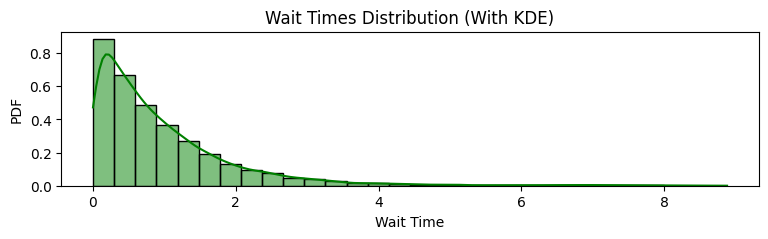

In [ ]:
######################  TODO  ########################

plt.figure(figsize=(9, 2))
sns.histplot(wait_times, kde=False, bins=30, color="blue", stat="density")
plt.title("Wait Times Distribution (Without KDE)")
plt.xlabel("Wait Time")
plt.ylabel("PDF")
plt.show()

plt.figure(figsize=(9, 2))
sns.histplot(wait_times, kde=True, bins=30, color="green", stat="density")
plt.title("Wait Times Distribution (With KDE)")
plt.xlabel("Wait Time")
plt.ylabel("PDF")
plt.show()

######################  TODO  ########################

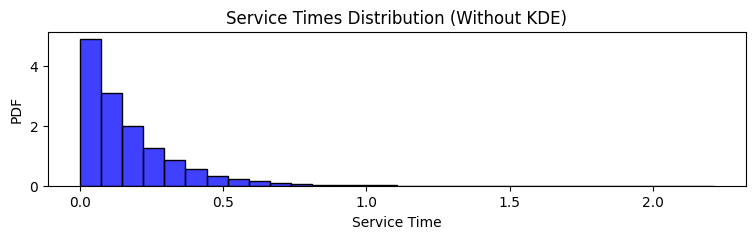

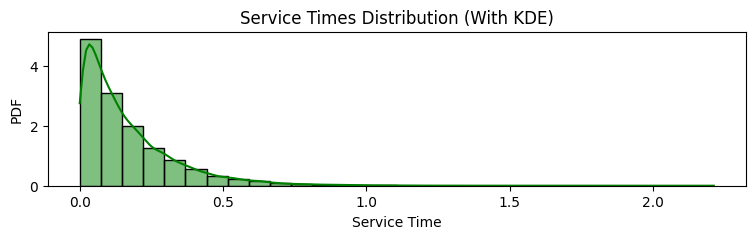

In [ ]:
######################  TODO  ########################

plt.figure(figsize=(9, 2))
sns.histplot(service_times, kde=False, bins=30, color="blue", stat="density")
plt.title("Service Times Distribution (Without KDE)")
plt.xlabel("Service Time")
plt.ylabel("PDF")
plt.show()

plt.figure(figsize=(9, 2))
sns.histplot(service_times, kde=True, bins=30, color="green", stat="density")
plt.title("Service Times Distribution (With KDE)")
plt.xlabel("Service Time")
plt.ylabel("PDF")
plt.show()

######################  TODO  ########################

**Kernel Density Estimation (KDE)** is a non-parametric way to estimate the probability density function of a random variable. It smooths the distribution of data points by placing a "kernel" (often a Gaussian) on each data point, which contributes to the overall density estimate.

**Why Use the kde Parameter?**

* Visual Clarity: Overlaying a KDE helps in visualizing the overall distribution of the data more smoothly compared to the binned histogram. It makes it easier to see the shape of the distribution. 

* Identifying Patterns: The KDE can help identify patterns such as skewness, bimodality, and other features of the distribution that might not be as clear in the histogram, especially when the data is limited or discrete.

## Plot the Joint Distributions

**Note:** Use `sns.jointplot` to plot the joint distributions

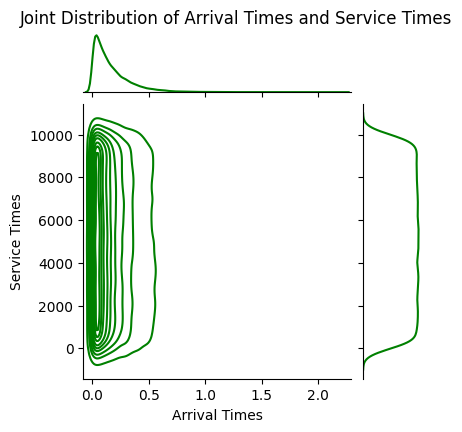

In [ ]:
######################  TODO  ########################

sns.jointplot(
    y=arrival_times,
    x=service_times,
    kind="kde",
    color="green",
    height=4,
    ratio=4
)

plt.suptitle("Joint Distribution of Arrival Times and Service Times", y=1.02)
plt.xlabel("Arrival Times")
plt.ylabel("Service Times")
plt.show()

######################  TODO  ########################

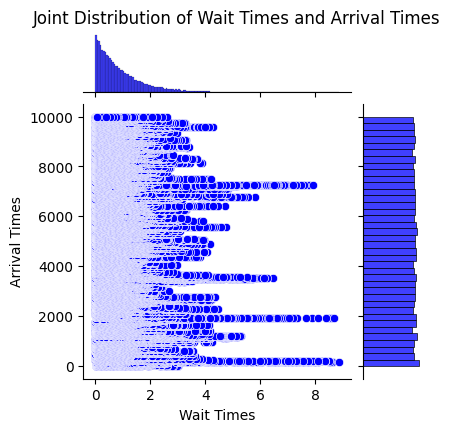

In [ ]:
######################  TODO  ########################

sns.jointplot(
    x=wait_times,
    y=arrival_times,
    kind="scatter",
    color="blue",
    height=4,
    ratio=4
)

plt.suptitle("Joint Distribution of Wait Times and Arrival Times", y=1.02)
plt.xlabel("Wait Times")
plt.ylabel("Arrival Times")
plt.show()

######################  TODO  ########################

## Analysis of Joint Distributions

Based on the visual analysis of the joint plot, since it did not show a clear trend or pattern, we conclude that there is no significant correlation between wait_times and arrival_times in our dataset. This implies that changes in arrival times do not strongly influence the wait times, and vice versa. (Note that the results of different kind-parameters (fisrt one is kde while the other one is scatter) does not make any difference in analyzing)

## Scatter Plot and Correlation

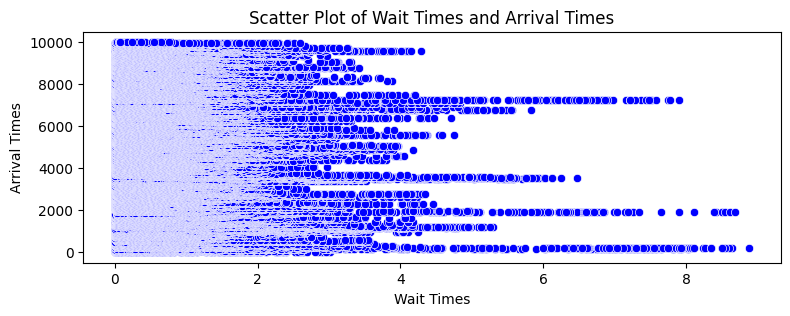

Correlation coefficient between the two: -0.14385302661542973


In [ ]:
######################  TODO  ########################

plt.figure(figsize=(9, 3))
sns.scatterplot(x=wait_times, y=arrival_times, color="blue")
plt.title("Scatter Plot of Wait Times and Arrival Times")
plt.xlabel("Wait Times")
plt.ylabel("Arrival Times")
plt.show()

print(f"Correlation coefficient between the two: {np.corrcoef(wait_times, arrival_times)[0, 1]}")

######################  TODO  ########################

## Calculating `total_times`

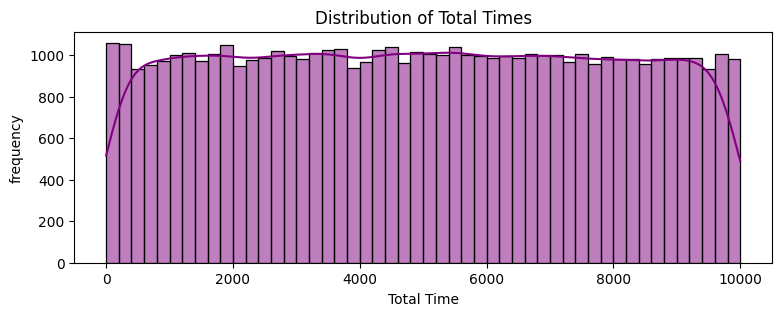

In [ ]:
######################  TODO  ########################

total_times = []
for i in range(len(wait_times)):
    total_times.append(wait_times[i] + arrival_times[i] + service_times[i])

plt.figure(figsize=(9, 3))
sns.histplot(total_times, kde=True, bins=50, color="purple")
plt.title("Distribution of Total Times")
plt.xlabel("Total Time")
plt.ylabel("frequency")
plt.show()

######################  TODO  ########################

The Distribution of Total Times is one of Uniform because every outcome within a specified range has an equal probability of occurring.
In other words, We expect to have almost the same total time for each of the individuals since all of them experience the same time distributions and with the same parameters.

## Conditional Wait Times

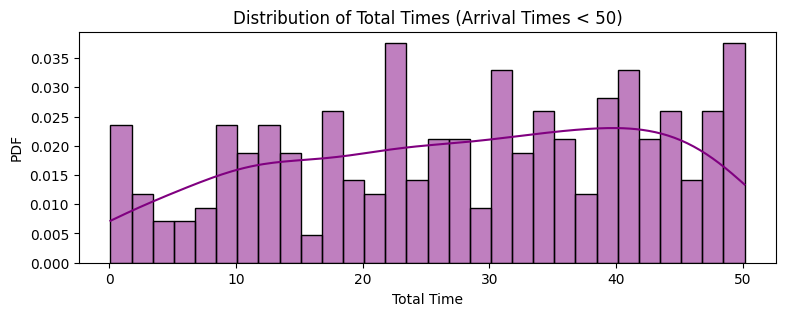

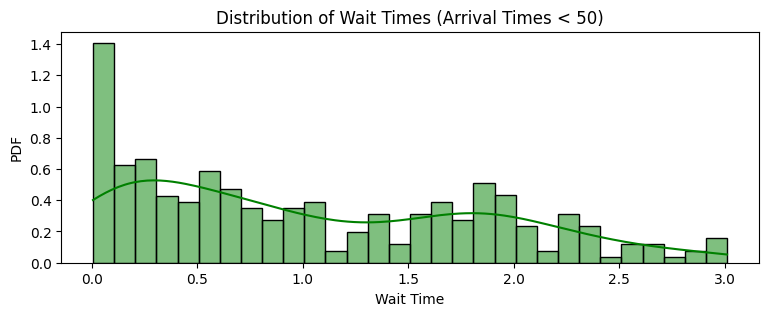

In [ ]:
######################  TODO  ########################

filtered_total_times = [] 
filtered_wait_times = [] 
for i in range(len(arrival_times)): 
    if arrival_times[i] < 50: 
        filtered_total_times.append(total_times[i]) 
        filtered_wait_times.append(wait_times[i])
    else:
        break


plt.figure(figsize=(9, 3))
sns.histplot(filtered_total_times, kde=True, bins=30, color="purple", stat='density')
plt.title("Distribution of Total Times (Arrival Times < 50)")
plt.xlabel("Total Time")
plt.ylabel("PDF")
plt.show()

plt.figure(figsize=(9, 3))
sns.histplot(filtered_wait_times, kde=True, bins=30, color="green", stat='density')
plt.title("Distribution of Wait Times (Arrival Times < 50)")
plt.xlabel("Wait Time")
plt.ylabel("PDF")
plt.show()


######################  TODO  ########################